In [100]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

# 1) Загрузим изображение

In [101]:
img = cv2.imread("C:\\Users\\Denis\\Downloads\\imforlab.png")

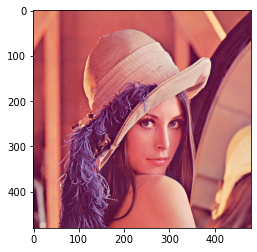

In [102]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


# 2) Поиск лица на изображении

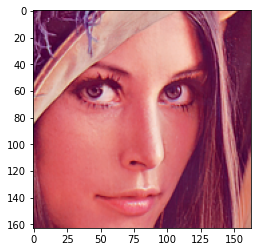

In [103]:
cascadePath = "C:\\Users\\Denis\\anaconda3\\pkgs\\libopencv-4.0.1-hbb9e17c_0\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)
faces = faceCascade.detectMultiScale(img)
x, y, w, h = faces[0]
detected_face_img = img[y : y + h, x : x + w]
    
plt.imshow(cv2.cvtColor(detected_face_img, cv2.COLOR_BGR2RGB))

# 3) Получим изображение с отступами от краёв

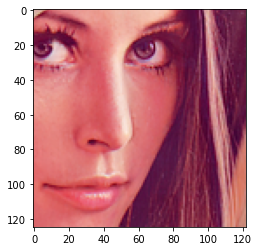

In [104]:
img = detected_face_img[math.ceil(0.2 * y):math.ceil(1.0 * y), math.ceil(0.2 * x):math.ceil(1.0 * x), :]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 4) Получение бинарного изображения краев

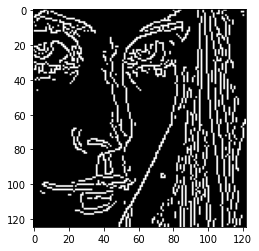

In [105]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 70, 90, 5);
plt.imshow(edges, cmap="gray")

# 5) Удалим мелкие границы, длина и ширина которых меньше 10

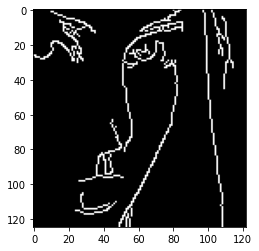

In [106]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
new_contoures = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w >= 10 and h >= 10:
        new_contoures.append(c)
maskk = np.zeros_like(edges)
cv2.drawContours(maskk, new_contoures, -1, (255, 255, 255), cv2.FILLED)
edges = cv2.bitwise_and(edges, edges, mask = maskk)
plt.imshow(edges, cmap="gray")

# 6) Морфологическая операция наращивания ( размер структурирующего элемента 5х5 )

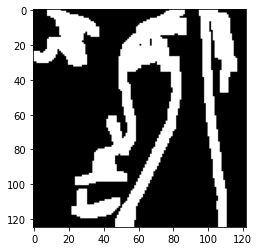

In [107]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilatation = cv2.dilate(edges, structuring_element)
plt.imshow(dilatation, cmap="gray")

# 7) Гауссовский фильтр 5x5 и нормализация до [0, 1]

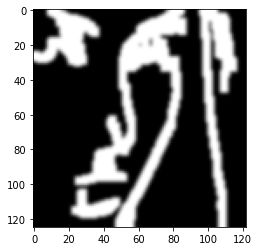

In [108]:
gauss = cv2.GaussianBlur(dilatation, (5, 5), 0)
plt.imshow(gauss, cmap="gray")

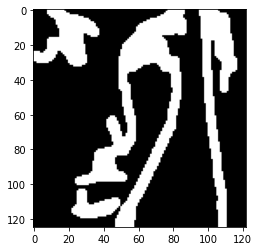

In [109]:
dst = np.zeros_like(gauss)
normalize_img = cv2.normalize(gauss, dst, 1, 0, cv2.NORM_INF)
plt.imshow(normalize_img, cmap="gray")

# 8) Применение биллатериальной фильтрации изображения

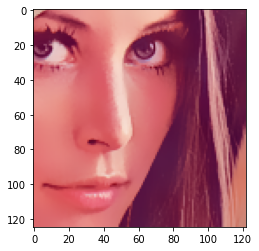

In [110]:
f1 = cv2.bilateralFilter(img, 10, 30, 20) 
plt.imshow(cv2.cvtColor(f1, cv2.COLOR_BGR2RGB))

# 9) Применение фильтра контрасности / чёткости изображения

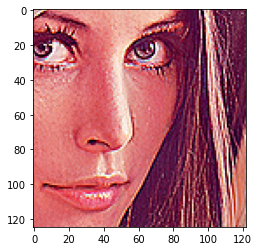

In [111]:
sharp = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
f2 = cv2.filter2D(img, -1, sharp)
plt.imshow(cv2.cvtColor(f2, cv2.COLOR_BGR2RGB))

# 10) Финальная фильтрация изображения

Выполним её по формуле:
Result[x,y,c] = M[x,y] * F2[x,y,c] + (1 - M[x,y]) * F1[x,y,c], где x=1..width, y=1..height, c = 1..3.

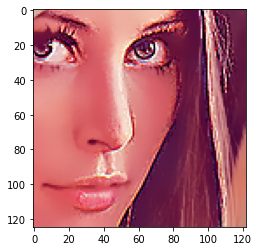

In [112]:
normalize_img = np.expand_dims(normalize_img, axis=2)
result_img = normalize_img * f2 + (1 - normalize_img) * f1
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))